<a href="https://colab.research.google.com/github/ewilli400/Trump_Tweets/blob/main/Final_Project_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#reading in the cleaned dataset and setting datetime as index
trump_tweets = pd.read_csv("https://github.com/ewilli400/trump/blob/main/out%20(4).csv?raw=true")
trump_tweets["date"] = pd.to_datetime(trump_tweets["date"], format="%Y-%m-%d %H:%M:%S")
trump_tweets.set_index("date", inplace=True)
trump_tweets.head()

,content,retweets,favorites,mentions,hashtags,target,insult,indicator,time,year
date,,,,,,,,,,
2009-05-04 20:54:25,Be sure to tune in and watch Donald Trump on L...,500,868,None,None,None,None,0.0,20:54:25,2009
2009-05-05 03:00:10,Donald Trump will be appearing on The View tom...,33,273,None,None,None,None,0.0,03:00:10,2009
2009-05-08 15:38:08,Donald Trump reads Top Ten Financial Tips on L...,12,18,None,None,None,None,0.0,15:38:08,2009
2009-05-08 22:40:15,New Blog Post: Celebrity Apprentice Finale and...,11,24,None,None,None,None,0.0,22:40:15,2009
2009-05-12 16:07:28,"""My persona will never be that of a wallflower...",1399,1965,None,None,None,None,0.0,16:07:28,2009


In [ ]:
#reading in dataset of word counts
df_years = pd.read_csv("https://github.com/ewilli400/trump/blob/main/years%20(1).csv?raw=true")
df_years.index = df_years.index + 2009
df_years.head()

,about,advice,all,along,an,and,are,as,at,be,beautiful,been,being,best,big,bit,book,business,but,by,call,can,check,com,could,day,days,did,donald,every,everyone,first,for,forget,forward,free,from,great,happy,has,...,or,our,out,people,read,say,show,that,the,them,there,they,think,to,today,tomorrow,tonight,top,trump,twitter,usa,ve,very,was,watch,way,we,what,who,will,win,with,wonderful,work,world,www,year,york,you,your
2009,2,1,5,2,2,20,1,1,2,9,1,1,2,1,3,3,7,3,1,3,1,3,3,42,2,4,1,1,42,1,1,2,7,1,1,1,6,3,4,2,...,1,1,4,1,4,1,2,4,28,1,1,2,9,19,3,1,2,3,48,1,1,1,3,3,5,1,2,1,1,4,1,10,1,1,3,7,1,1,10,10
2010,4,1,9,2,7,66,3,5,39,47,8,3,3,9,1,20,1,1,2,7,3,1,7,31,2,6,1,1,10,3,9,1,50,8,6,1,14,29,8,4,...,1,9,9,1,2,1,14,4,148,2,6,2,1,77,6,8,24,1,49,2,8,3,6,12,6,3,13,2,5,22,5,22,2,3,6,23,2,7,7,6
2011,36,2,34,1,23,289,64,31,115,131,4,11,8,18,7,203,45,7,15,38,3,37,14,28,5,11,1,13,15,5,8,21,124,11,6,3,66,56,10,65,...,20,113,37,26,12,5,23,75,672,10,20,42,10,376,57,10,37,1,68,3,6,5,19,39,52,11,117,24,26,95,4,129,3,11,27,8,14,1,60,44
2012,176,5,223,8,172,993,422,185,356,636,27,78,69,78,91,622,22,44,151,230,18,233,11,70,56,44,24,85,79,45,32,59,690,5,27,22,220,413,45,303,...,87,281,145,139,30,38,84,442,2841,64,77,274,75,1722,111,53,77,30,277,22,22,26,146,269,79,41,324,178,172,489,73,402,28,76,74,34,78,32,512,134
2013,262,28,484,8,214,1846,780,317,604,1054,62,117,157,236,245,520,46,127,387,316,29,388,32,185,94,130,20,131,331,70,76,93,1239,16,63,23,261,1005,115,336,...,198,346,211,346,73,100,183,798,3876,156,159,415,341,2514,133,43,118,69,850,116,48,64,328,382,98,115,425,436,267,807,84,574,38,191,137,33,91,64,2394,662


In [ ]:
#Did the amount of criticism tweets change over time?
bar_df = trump_tweets.resample("Y")["indicator"].sum()[6:]
bar_df.index = ["2015", "2016", "2017", "2018", "2019", "2020"]

import altair as alt
import pandas as pd

source = pd.DataFrame({
    'Year': bar_df.index,
    'Frequency': bar_df
})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Frequency',
    color=alt.Color('Year', legend=None)
)

alt.Chart(...)

Text(0, 0.5, 'Percentage of Tweets Per Year')

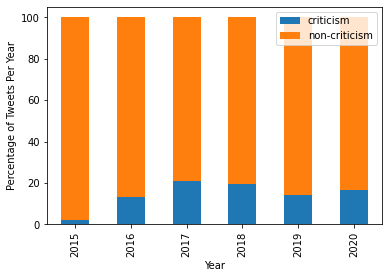

In [ ]:
#How did the proportion of criticism tweets to all tweets change per year?
plotdata = pd.DataFrame((trump_tweets.resample("Y")["indicator"].sum()/trump_tweets.resample("Y").count()["content"])[6:], columns=["insult"])
plotdata["criticism"] = plotdata["insult"]
plotdata["non-criticism"] = 1 - trump_tweets.resample("Y")["indicator"].sum()/trump_tweets.resample("Y").count()["content"]
plotdata = plotdata.drop(columns=["insult"])

import matplotlib.pyplot as plt

stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.index = ["2015", "2016", "2017", "2018", "2019", "2020"]
stacked_data.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Percentage of Tweets Per Year")

In [ ]:
#Tabular representation of proportion of criticism and non-criticism tweets.
plotdata

,criticism,non-criticism
date,,
2015-12-31,0.022542,0.977458
2016-12-31,0.133131,0.866869
2017-12-31,0.208333,0.791667
2018-12-31,0.193796,0.806204
2019-12-31,0.141674,0.858326
2020-12-31,0.165746,0.834254


In [ ]:
#Who did trump target most in his tweets?
trump_tweets["target"].value_counts()[1:11]

the-media              286
hillary-clinton        228
democrats              187
trump-russia           112
impeachment-inquiry     80
adam-schiff             58
ted-cruz                54
mueller-team            50
the-new-york-times      35
obamacare               35
Name: target, dtype: int64

In [ ]:
#How did Trump's total amount of tweets change over time?
bar_df = trump_tweets.resample("6m").count()["content"]
bar_df.index = ["2009 / 1st half", "2009 / 2nd half", 
          "2010 / 1st half", "2010 / 2nd half",
          "2011 / 1st half", "2011 / 2nd half",
          "2012 / 1st half", "2012 / 2nd half",
          "2013 / 1st half", "2013 / 2nd half",
          "2014 / 1st half", "2014 / 2nd half",
          "2015 / 1st half", "2015 / 2nd half",
          "2016 / 1st half", "2016 / 2nd half",
          "2017 / 1st half", "2017 / 2nd half",
          "2018 / 1st half", "2018 / 2nd half",
          "2019 / 1st half", "2019 / 2nd half",
          "2020 / 1st half"]

source = pd.DataFrame({
    'Year': bar_df.index,
    'Frequency': bar_df
})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Frequency',
    color=alt.Color('Frequency')
)

alt.Chart(...)

In [ ]:
#Replace 0 values with 1 so we don't get infinity values for ratio
trump_tweets["favorites"].replace(to_replace=0, value=1, inplace=True)
trump_tweets["retweets"].replace(to_replace=0, value=1, inplace=True)

#How did ratio of retweets to favorites change over time?
trump_tweets["ratio"] = trump_tweets["retweets"]/trump_tweets["favorites"]
trump_tweets["ratio"].fillna(0, inplace=True)

bar_df = trump_tweets.resample("6m")["ratio"].mean()
bar_df.index = ["2009 / 1st half", "2009 / 2nd half", 
          "2010 / 1st half", "2010 / 2nd half",
          "2011 / 1st half", "2011 / 2nd half",
          "2012 / 1st half", "2012 / 2nd half",
          "2013 / 1st half", "2013 / 2nd half",
          "2014 / 1st half", "2014 / 2nd half",
          "2015 / 1st half", "2015 / 2nd half",
          "2016 / 1st half", "2016 / 2nd half",
          "2017 / 1st half", "2017 / 2nd half",
          "2018 / 1st half", "2018 / 2nd half",
          "2019 / 1st half", "2019 / 2nd half",
          "2020 / 1st half"]

source = pd.DataFrame({
    'Year': bar_df.index,
    'Ratio (retweets / favorites)': bar_df
})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Ratio (retweets / favorites)',
    color=alt.Color('Ratio (retweets / favorites)')
)

alt.Chart(...)

In [ ]:
#When did Trump use the highest proportion of hashtags?
trump_tweets["hashtag_indicator"] = trump_tweets["hashtags"].map({
    "None": 0
})
trump_tweets["hashtag_indicator"].fillna(1, inplace=True)

bar_df = trump_tweets.resample("Y")["hashtag_indicator"].sum()/trump_tweets.resample("Y").count()["content"]
bar_df.index = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]

source = pd.DataFrame({
    'Year': bar_df.index,
    'Frequency': bar_df
})

alt.Chart(source).mark_bar().encode(
    x='Year',
    y='Frequency',
    color=alt.Color('Frequency'),
)

alt.Chart(...)

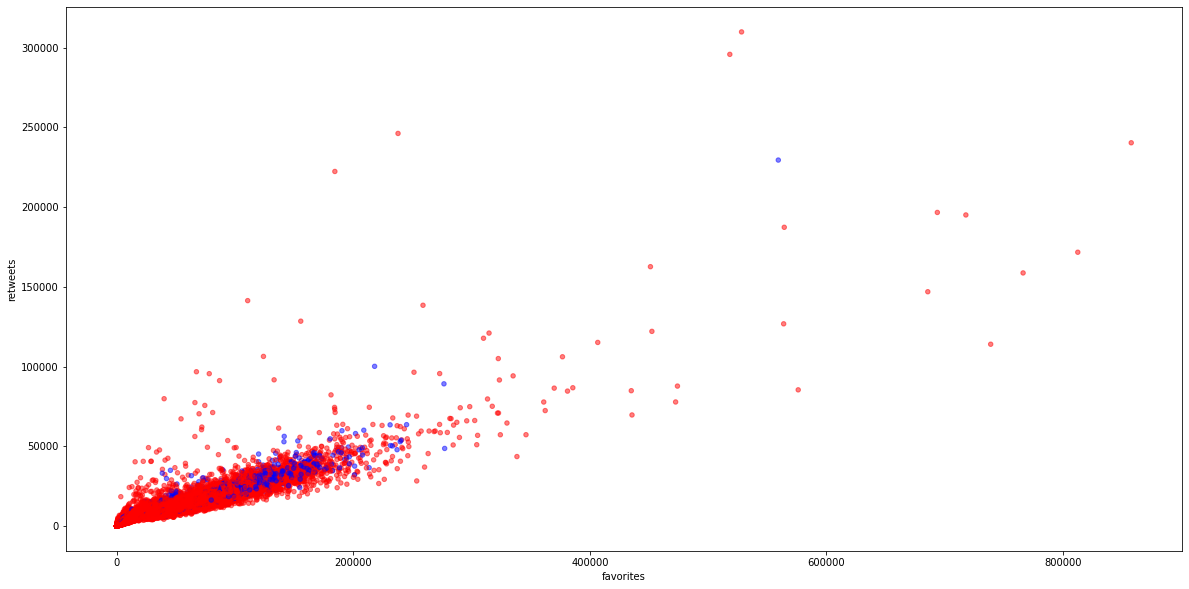

In [ ]:
#What is the relationship between favorites and retweets? How does being a criticism or not affect this relationship?
colors = trump_tweets["indicator"].map({
    0: "red",
    1: "blue"
})
trump_tweets.plot.scatter(x="favorites", y="retweets", c=colors, alpha=.5, legend=True)

In [ ]:
#What is the correlation between favorites and retweets?
trump_tweets["favorites"].corr(trump_tweets["retweets"])

0.9444413875919511

In [ ]:
#Which insult tweet was the outlier with more favorites and retweets?
pd.options.display.max_colwidth = 300
trump_tweets[(trump_tweets["favorites"]>500000) & (trump_tweets["indicator"] == 1)]["content"][0]

'Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!'

In [ ]:
#Fitting a linear regression model to the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

trump_train = trump_tweets.copy()
trump_train, trump_test = train_test_split(trump_train, test_size=0.3)

X_train = trump_train[["favorites"]]
X_test = trump_test[["favorites"]]
y_train = trump_train["retweets"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([  325.45337384,   310.30348648,   333.71694876, ...,
       16842.96237861,   326.37154883,   321.32158638])

In [ ]:
model.coef_

array([0.22954375])

In [ ]:
model.intercept_

310.0739427329572

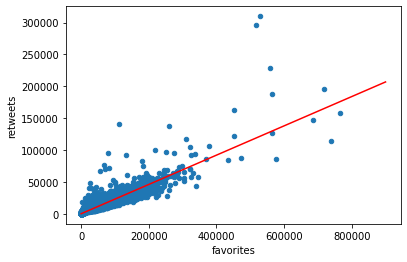

In [ ]:
#Plotting the linear regression
import numpy as np

X_new = pd.DataFrame()
X_new["favorites"] = np.linspace(0, 900000, num=200)

y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["favorites"]   
)

trump_train.plot.scatter(x="favorites", y="retweets")
y_new_.plot.line(color=["red"])

In [ ]:
#Sort insults by target
insults_df = trump_tweets["target"].to_frame().join(trump_tweets["insult"])
insults_df = insults_df[insults_df["target"] != "None"].sort_values("target")

with pd.option_context("display.max_rows", None, "display.max_columns", None):
  display(insults_df)

,target,insult
date,,
2016-10-16 14:31:40,2016-election,"being rigged by the media, in a coordinated effort with the Clinton campaign"
2016-10-15 14:23:08,2016-election,rigged
2016-10-16 19:01:12,2016-election,absolutely being rigged
2016-10-15 13:45:58,2016-election,is being rigged
2019-05-08 14:48:15,2020-dem-candidates,very weak
2019-04-25 14:22:18,2020-dem-candidates,people who truly have some very sick & demented ideas
2018-02-19 05:28:40,60-minutes,"questions were biased and slanted, the facts incorrect"
2018-11-26 03:07:27,60-minutes,Fake 60 Minutes!
2015-07-22 02:53:41,???,failing


In [ ]:
#Top word usage (including "the", "to", "and", etc.)
df_word_count = df_years.append(df_years.sum(numeric_only=True), ignore_index=True).drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df_word_count = df_word_count.transpose()
df_word_count = df_word_count.sort_values(12, ascending=False)
df_word_count = df_word_count[df_word_count[12] >= 250]

In [ ]:
#Remove non-english words (dictionary isn't super reliable but is accurate for most frequent words so we'll roll with it)
import nltk
nltk.download("words")

english = []

def removeNonEnglishWordsFunct(x):
    words = set(nltk.corpus.words.words())
    filteredSentence = " ".join(w for w in nltk.wordpunct_tokenize(x) \
                                if w.lower() in words or not w.isalpha())
    return filteredSentence

for i in df_word_count.index:
  english.append(removeNonEnglishWordsFunct(i))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Additional filtering
english_words = []
for i in english:
  if i != "" and "0" not in i and "1" not in i:
    english_words.append(i)

In [ ]:
#Create dataframe of uses index by word
new_col = []
for i in df_word_count.index:
  new_col.append(i in english_words)

df_word_count["english"] = new_col
df_word_count = df_word_count[df_word_count["english"] == True]
df_word_count = df_word_count.drop(columns = ["english"])
df_word_count = df_word_count.rename(columns ={12: "uses"})

In [ ]:
#Most liked insults
i = trump_tweets[trump_tweets["favorites"] > 200000]
i = i[i["indicator"] == 1]

pd.options.display.max_colwidth = 300
i.sort_values(by="favorites", ascending=False)["content"]

date
2017-11-12 01:48:01                                                                                                             Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!
2020-01-04 23:16:27      As hard as I work, & as successful as our Country has become with our Economy, our Military & everything else, it is ashame that the Democrats make us spend so much time & money on this ridiculous Impeachment Lite Hoax. I should be able to devote all of my time to the REAL USA!
2018-01-01 13:12:00    The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies & deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. No more!
2017-11-19 18:42:36                                                     Now that th

In [ ]:
#Dataframe of word counts
word_counts = df_years.sum(axis=0)
word_counts.sort_values(ascending=False, inplace=True)
df_word = pd.DataFrame(word_counts)
df_word.reset_index(inplace=True)
df_word

,index,0
0,the,32382
1,to,18677
2,and,14662
3,of,12450
4,is,12135
...,...,...
106,along,148
107,forget,131
108,late,113
109,list,99


In [ ]:
#Most used words
top_words = []
for i in range(0, 10):
  top_words += [df_word.iloc[i]['index']]

top_words

['the', 'to', 'and', 'of', 'is', 'in', 'you', 'for', 'on', 'com']

In [ ]:
top_words = ["trump", "great", "twitter", "people", "donald", "very", "can", "more", "big", "make"]

In [ ]:
#Dataframe of counts of most used word by year
df_top = df_years[top_words]
df_top = df_top.T
for i in range(2009, 2021):
  df_top[i] = df_top[i] / len(trump_tweets[trump_tweets["year"] == i])


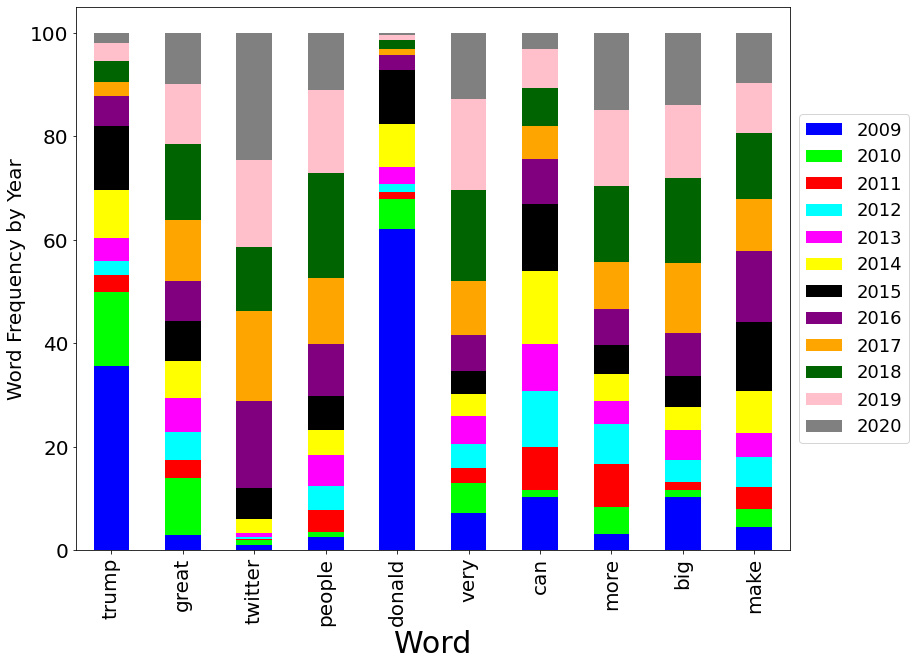

In [ ]:
#How did use of top words change by year?
stacked_data = df_top.apply(lambda x: x*100/sum(x), axis=1)
ax = stacked_data.plot(kind="bar", stacked=True, color=["blue", "lime", "red", "cyan", "magenta", "yellow", "black", "purple", "orange", "darkgreen", "pink", "grey"])
plt.xlabel("Word")
plt.ylabel("Word Frequency by Year")
plt.rcParams["figure.figsize"] = (20,10)
for item in ([ax.title, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()